In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
        
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
data.rename(columns={'gender': 'male'}, inplace=True)
print(data["restingBP"].min())
print(data["restingBP"].max())
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data.drop(columns=["patientid"], axis=1, inplace=True)
print(data["male"].value_counts())
print(data["target"].value_counts())
print(data["target"][data["male"]==0].value_counts())
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data

94
200
male
1    765
0    235
Name: count, dtype: int64
target
1    580
0    420
Name: count, dtype: int64
target
1    133
0    102
Name: count, dtype: int64


,age,male,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


Cross-Validation Scores: [0.96875 0.96875 0.9875  0.98125 0.9625 ]
Mean Accuracy: 0.9738


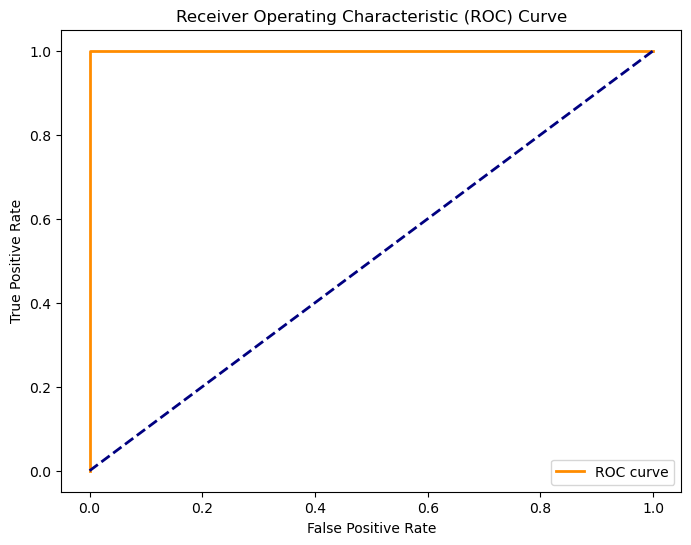


Accuracy on Test Set: 0.9900
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        83
           1       0.98      1.00      0.99       117

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def create_xgboost_model(learning_rate=0.1, max_depth=2, n_estimators=129):
    model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
    return model
xgboost_model = create_xgboost_model()
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=35)

cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=cv, scoring=make_scorer(accuracy_score))
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAccuracy on Test Set: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)